In [1]:
#scrap info

In [2]:
import time
import requests
import matplotlib.pyplot as plt


In [3]:
import tools.scraping as weather
import tools.dataset as ds

In [4]:
date="2017-12-11"

In [5]:
weather.getWeather(date, "Madrid")

{'Tmax_C': 10.2,
 'Tmin_C': 4.3,
 'Prec_lm2': 0.0,
 'Wind_ms': 3.1,
 'Direction': 24.0}

### Load datase

In [34]:
date1=ds.setDate("2017-12-11")
print("Fecha ",date1)
#print("Periodo ",ds.getPeriod())
delta=ds.setDelta(40)
print("Delta ",delta)
df_pollution=ds.getDataset(date1, delta)
print("Tamaño dataset ",df_pollution.shape)
df_pollution.head()

Fecha  2017-12-11
Delta  40 days, 0:00:00
Tamaño dataset  (279216, 16)


,date,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2017-06-01 01:00:00,NaN,NaN,0.3,NaN,NaN,4.0,38.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,28079004
1,2017-06-01 01:00:00,0.6,NaN,0.3,0.4,0.08,3.0,39.0,NaN,71.0,22.0,9.0,7.0,1.4,2.9,28079008
2,2017-06-01 01:00:00,0.2,NaN,NaN,0.1,NaN,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,0.9,28079011
3,2017-06-01 01:00:00,NaN,NaN,0.2,NaN,NaN,1.0,9.0,NaN,91.0,NaN,NaN,NaN,NaN,NaN,28079016
4,2017-06-01 01:00:00,NaN,NaN,NaN,NaN,NaN,1.0,19.0,NaN,69.0,NaN,NaN,2.0,NaN,NaN,28079017


### Convertir date en el index de las filas y agrupar valores

In [37]:
df_pollution=ds.dateToIndex(df_pollution)
df_pollution_mean=ds.meanbyDate(df_pollution)
df_pollution_mean.head()

Hola


,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station
datetime,,,,,,,,,,,,,,,
2017-01-01 01:00:00,1.38,NaN,0.61,0.150,0.166667,44.333333,47.541667,NaN,4.846154,25.000000,28.666667,13.8,1.543333,2.74,28079037.75
2017-01-01 02:00:00,1.52,NaN,0.63,0.175,0.190000,65.375000,53.000000,NaN,4.230769,45.666667,47.500000,11.1,1.583333,3.24,28079037.75
2017-01-01 03:00:00,1.92,NaN,0.60,0.225,0.176667,62.208333,52.666667,NaN,4.307692,40.555556,46.666667,9.2,1.590000,3.86,28079037.75
2017-01-01 04:00:00,1.48,NaN,0.58,0.200,0.166667,57.083333,50.125000,NaN,4.769231,32.200000,30.166667,8.7,1.590000,2.98,28079037.75
2017-01-01 05:00:00,1.32,NaN,0.48,0.150,0.160000,41.583333,44.750000,NaN,4.923077,25.454545,24.333333,9.6,1.583333,2.56,28079037.75


### Pintar grafica

In [28]:
#date=datetime.date(2017,1,20)
#dateDelta=datetime.timedelta(days=4)
filter_before=df_pollution_mean.index.date>=(date1-delta)
filter_after=df_pollution_mean.index.date<=(date1+delta)

df=df_pollution_mean[filter_before & filter_after]

df.columns

Index(['BEN', 'CH4', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'NOx', 'O_3', 'PM10',
       'PM25', 'SO_2', 'TCH', 'TOL', 'station'],
      dtype='object')

In [9]:
# pintar sobre la gáfica los l/m2


/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


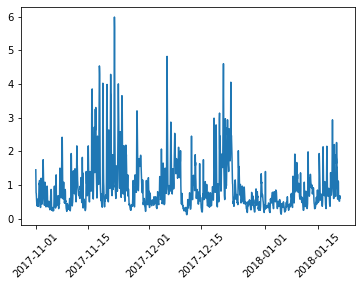

In [15]:

plt.plot(df["BEN"])
plt.xticks(rotation=45)
plt.savefig("fig.png")

In [40]:
df.head()

,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station
date,,,,,,,,,,,,,,,
2017-01-01 01:00:00,1.38,NaN,0.61,0.150,0.166667,44.333333,47.541667,NaN,4.846154,25.000000,28.666667,13.8,1.543333,2.74,28079037.75
2017-01-01 02:00:00,1.52,NaN,0.63,0.175,0.190000,65.375000,53.000000,NaN,4.230769,45.666667,47.500000,11.1,1.583333,3.24,28079037.75
2017-01-01 03:00:00,1.92,NaN,0.60,0.225,0.176667,62.208333,52.666667,NaN,4.307692,40.555556,46.666667,9.2,1.590000,3.86,28079037.75
2017-01-01 04:00:00,1.48,NaN,0.58,0.200,0.166667,57.083333,50.125000,NaN,4.769231,32.200000,30.166667,8.7,1.590000,2.98,28079037.75
2017-01-01 05:00:00,1.32,NaN,0.48,0.150,0.160000,41.583333,44.750000,NaN,4.923077,25.454545,24.333333,9.6,1.583333,2.56,28079037.75


In [32]:
df.date=df.index
df.date
df.columns


Index(['BEN', 'CH4', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'NOx', 'O_3', 'PM10',
       'PM25', 'SO_2', 'TCH', 'TOL', 'station'],
      dtype='object')

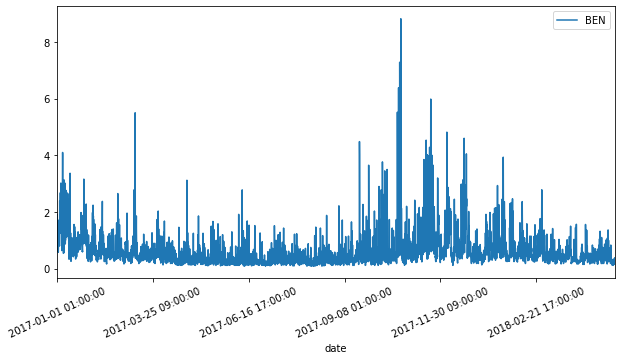

In [58]:
fig, ax = plt.subplots()
df.plot(y="BEN", ax=ax,figsize=(10,5))
plt.xticks(rotation='25')

fig.savefig("fig.png")

In [ ]:
#Crear PDF



In [59]:
from fpdf import FPDF

pdf = FPDF()
pdf.add_page()
pdf.set_font('Arial', 'B', 16)
pdf.cell(40, 10, 'Analisis de contaminacion en Madrid')
pdf.image('fig.png',50,50)
pdf.output('Analiseis_Contaminacion_{}-{}-{}.pdf'.format(date1.day,date1.month,date1.year), 'F')


''

In [ ]:
#Enviar mail
import os

os.getcwd()



In [67]:
date1


datetime.date(2017, 12, 11)

In [ ]:
#Adjuntar pdf al mail

In [70]:
from email import encoders
from email.mime.base import MIMEBase
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

In [64]:
to="pipeironhack@gmail.com"

In [77]:
import smtplib
import getpass

gmail_user = to
gmail_password = getpass.getpass("Enter your password: ")

try: 
    server = smtplib.SMTP_SSL('smtp.gmail.com', 465)
    print(1)
    server.ehlo()
    print(2)
    server.login(gmail_user, gmail_password)
    print("Connected to gmail servers")
except:  
    print("Something went wrong...")

Enter your password: ········
1
2
Connected to gmail servers


In [80]:
# Mail Content
from_mail = gmail_user
#to = input("Who should receive the mail?")

subject = "An email with attachment from Python"
body = "This is an email with attachment sent from Python"
sender_email = to
receiver_email = to


# Create a multipart message and set headers
message = MIMEMultipart()
message["From"] = sender_email
message["To"] = receiver_email
message["Subject"] = subject
message["Bcc"] = receiver_email  # Recommended for mass emails

message.attach(MIMEText(body, "plain"))

# Open PDF file in binary mode
filename='Analisis_Contaminacion.pdf'
filepath='../Output/Analisis_Contaminacion.pdf'

with open(filepath, "rb") as attachment:
    # Add file as application/octet-stream
    # Email client can usually download this automatically as attachment
    part = MIMEBase("application", "octet-stream")
    part.set_payload(attachment.read())

    # Encode file in ASCII characters to send by email    
encoders.encode_base64(part)

# Add header as key/value pair to attachment part
part.add_header(
    "Content-Disposition",
    f"attachment; filename= {filename}",
)

# Add attachment to message and convert message to string
message.attach(part)
text = message.as_string()




server.sendmail(from_mail, to, text)

# Want more? https://stackoverflow.com/questions/882712/sending-html-email-using-python

{}

In [81]:
server.close()